# Final Parse

### Returns the dataframe for the each of the data sets

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import array
import os
from array import *

In [2]:
data1 = pd.read_csv('output_data/localization.csv', header=0, sep=";")
data1 = data1.drop(data1.columns[0], axis=1)
display(data1.head())

,time_in_ms,Latitude,Longitude
0,1538352000409,6326.321921,1024.551737
1,1538352001409,6326.321918,1024.551734
2,1538352002409,6326.321919,1024.551739
3,1538352003409,6326.321916,1024.551739
4,1538352004408,6326.321912,1024.551737


In [3]:
data2 = pd.read_csv('output_data/GroundSpeed.csv', header=0, sep=";")
data2 = data2.drop(data2.columns[0], axis=1)
display(data2.head())

,time_in_ms,TransGroundSpeed,LonGroundSpeed
0,1538352000409,0.0,0.0
1,1538352001409,0.0,0.0
2,1538352002409,0.0,0.0
3,1538352003409,-0.0,0.0
4,1538352004408,0.0,0.0


In [4]:
data3 = pd.read_csv('output_data/ThrustData.csv', header=0, sep=";")
data3 = data3.drop(data3.columns[0], axis=1)
display(data3.head())

,time_in_ms,RPMOrder,AzimuthOrder
0,1538352000409,0.0,-0.687561
1,1538352001409,0.0,-0.912415
2,1538352002409,0.0,0.213345
3,1538352003409,0.0,0.213345
4,1538352004408,0.0,0.213345


In [5]:
data4 = pd.read_csv('output_data/CourseTrue.csv', header=0, sep=";")
data4 = data4.drop(data4.columns[0], axis=1)
display(data4.head())

,time_in_ms,CourseTrue
0,1538352000409,241.80
1,1538352001409,265.84
2,1538352002409,269.02
3,1538352003409,179.20
4,1538352004408,208.73


In [6]:
# Here os taken the list of points in which the graphic seems broken and have a variation over 1%
diff_list = []

lenght = len(data1["Longitude"]) - 1

if (os.path.isfile('./output_data/diff_list.csv')):
    teste = pd.read_csv('diff_list.csv', header=None, sep=";")
    diff_list = teste.values
else:
    # Tanking the one that has at least 1% of difference
    arr = np.array([])
    for i in range(lenght):
        dist = math.fabs((data1["Longitude"][i+1] - data1["Longitude"][i])/data1["Longitude"][i])
        if (dist > 0.01):
            diff_list.append(i)   

    arr = np.append(arr, diff_list)
    np.savetxt('/output_data/diff_list.csv', [arr], delimiter=';', fmt='%d')

In [7]:
diff_list = np.insert(diff_list, 0, 0, axis=1)
i = len(diff_list[0])
diff_list = np.insert(diff_list,  i, len(data1["time_in_ms"]), axis=1)

In [8]:
display(diff_list)

array([[      0,   33563,   49700,  115104,  141229,  290615,  293640,
         373788,  386268, 1242322, 1254551, 1338756, 1439814, 1944475]],
      dtype=int64)

In [9]:
display(data1.Longitude[33562:33567])

33562    1000.008474
33563    1000.003115
33564     959.997753
33565     959.992381
33566     959.987007
Name: Longitude, dtype: float64

In [10]:
array1 = np.array([])
length = len(diff_list[0])
i = 0
while (i < length):
    array1 = np.insert(array1, i, diff_list[0][i])
    i += 1

In [11]:
data = data1.merge(data2, how='inner', on='time_in_ms')
display(data.head())

,time_in_ms,Latitude,Longitude,TransGroundSpeed,LonGroundSpeed
0,1538352000409,6326.321921,1024.551737,0.0,0.0
1,1538352001409,6326.321918,1024.551734,0.0,0.0
2,1538352002409,6326.321919,1024.551739,0.0,0.0
3,1538352003409,6326.321916,1024.551739,-0.0,0.0
4,1538352004408,6326.321912,1024.551737,0.0,0.0


In [12]:
data = data.merge(data3, how='inner', on='time_in_ms')
display(data.head())

,time_in_ms,Latitude,Longitude,TransGroundSpeed,LonGroundSpeed,RPMOrder,AzimuthOrder
0,1538352000409,6326.321921,1024.551737,0.0,0.0,0.0,-0.687561
1,1538352001409,6326.321918,1024.551734,0.0,0.0,0.0,-0.912415
2,1538352002409,6326.321919,1024.551739,0.0,0.0,0.0,0.213345
3,1538352003409,6326.321916,1024.551739,-0.0,0.0,0.0,0.213345
4,1538352004408,6326.321912,1024.551737,0.0,0.0,0.0,0.213345


In [13]:
data = data.merge(data4, how='inner', on='time_in_ms')
display(data.head())

,time_in_ms,Latitude,Longitude,TransGroundSpeed,LonGroundSpeed,RPMOrder,AzimuthOrder,CourseTrue
0,1538352000409,6326.321921,1024.551737,0.0,0.0,0.0,-0.687561,241.80
1,1538352001409,6326.321918,1024.551734,0.0,0.0,0.0,-0.912415,265.84
2,1538352002409,6326.321919,1024.551739,0.0,0.0,0.0,0.213345,269.02
3,1538352003409,6326.321916,1024.551739,-0.0,0.0,0.0,0.213345,179.20
4,1538352004408,6326.321912,1024.551737,0.0,0.0,0.0,0.213345,208.73


In [14]:
print(len(array1))
i = 0
length = len(array1) - 1

df = []
while (i < length):
    df.append(data[:][int(array1[i]):int(array1[i+1])])
    i += 1

14


In [15]:
display(data[:][0:2])
display(type(df))

,time_in_ms,Latitude,Longitude,TransGroundSpeed,LonGroundSpeed,RPMOrder,AzimuthOrder,CourseTrue
0,1538352000409,6326.321921,1024.551737,0.0,0.0,0.0,-0.687561,241.80
1,1538352001409,6326.321918,1024.551734,0.0,0.0,0.0,-0.912415,265.84


list

In [16]:
display(df[0].head())

,time_in_ms,Latitude,Longitude,TransGroundSpeed,LonGroundSpeed,RPMOrder,AzimuthOrder,CourseTrue
0,1538352000409,6326.321921,1024.551737,0.0,0.0,0.0,-0.687561,241.80
1,1538352001409,6326.321918,1024.551734,0.0,0.0,0.0,-0.912415,265.84
2,1538352002409,6326.321919,1024.551739,0.0,0.0,0.0,0.213345,269.02
3,1538352003409,6326.321916,1024.551739,-0.0,0.0,0.0,0.213345,179.20
4,1538352004408,6326.321912,1024.551737,0.0,0.0,0.0,0.213345,208.73


In [17]:
print(data.columns)

Index(['time_in_ms', 'Latitude', 'Longitude', 'TransGroundSpeed',
       'LonGroundSpeed', 'RPMOrder', 'AzimuthOrder', 'CourseTrue'],
      dtype='object')


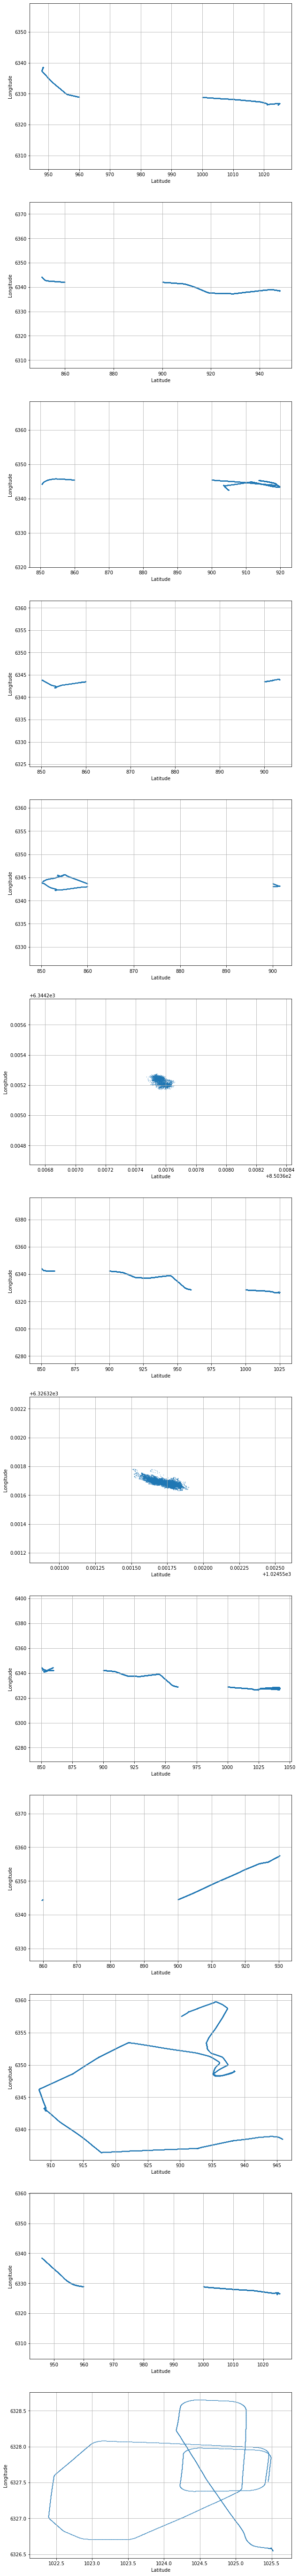

In [18]:
# start with a rectangular Figure
fig, axScatter = plt.subplots(length, 1, figsize=(10,100))

i = 0
for ax in axScatter:
    ax.scatter( df[i].Longitude.values, df[i].Latitude.values, s=.1)
    ax.grid()
    ax.set_xlabel("Latitude")
    ax.set_ylabel("Longitude")
    ax.axis('equal')
    i += 1

# the scatter plot:

plt.show()

In [19]:
display(df[12].head())

,time_in_ms,Latitude,Longitude,TransGroundSpeed,LonGroundSpeed,RPMOrder,AzimuthOrder,CourseTrue
1439814,1539888620409,6326.553513,1025.516641,-0.0,0.00,0.0,0.439816,329.11
1439815,1539888621409,6326.553513,1025.516643,0.0,0.00,0.0,0.213345,27.17
1439816,1539888622409,6326.553511,1025.516646,-0.0,0.01,0.0,0.213345,357.25
1439817,1539888623409,6326.553512,1025.516646,-0.0,0.00,0.0,0.213345,8.39
1439818,1539888624409,6326.553513,1025.516644,-0.0,0.00,0.0,0.213345,326.59


In [20]:
display(len(df))

13

# Export this data set as the best example

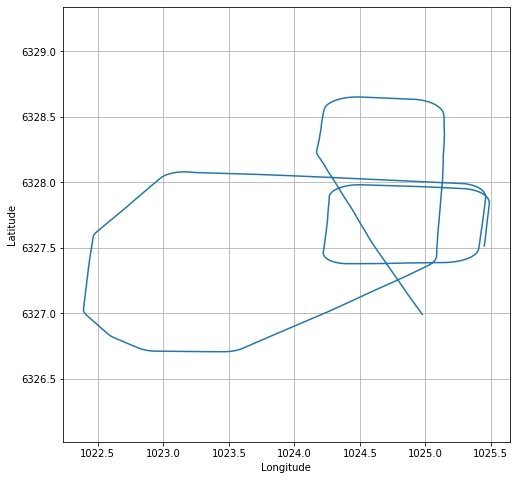

In [28]:
# start with a rectangular Figure
fig = plt.figure(1, figsize=(8,8))
axScatter = plt.axes()

# data = df[12].iloc[403000:407518, :]
data = df[12].iloc[403000:407518, :]

# the scatter plot:
axScatter.plot(data.Longitude.values, data.Latitude.values)
axScatter.grid()
axScatter.set_xlabel("Longitude")
axScatter.set_ylabel("Latitude")
axScatter.axis('equal')
plt.show()

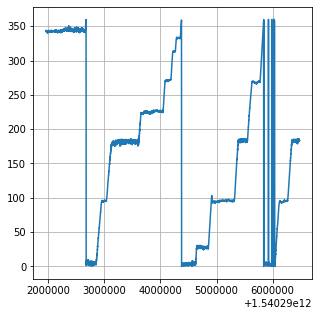

In [23]:
# start with a rectangular Figure
fig = plt.figure(2, figsize=(5,5))
axScatter = plt.axes()

# data = df[12].iloc[403000:407518, :]
# data = df[12].iloc[403000:407518, :]

# the scatter plot:
axScatter.plot(data.time_in_ms.values, data.CourseTrue.values)
axScatter.grid()
# axScatter.axis('equal')
plt.show()

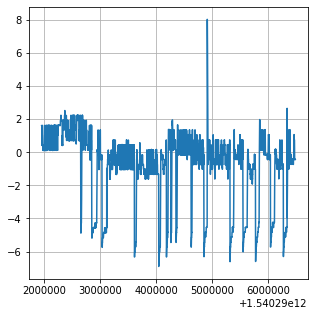

In [24]:
# start with a rectangular Figure
fig = plt.figure(2, figsize=(5,5))
axScatter = plt.axes()

# data = df[12].iloc[403000:407518, :]
# data = df[12].iloc[403000:407518, :]

# the scatter plot:
axScatter.plot(data.time_in_ms.values, data.AzimuthOrder.values)
axScatter.grid()
# axScatter.axis('equal')
plt.show()

### Change the coordinates of systems using plate carrée projection by (x, y)

In [25]:
print (len(data))

4517


In [ ]:
print(data.head())

In [ ]:
# Constants for the function
phi0 = data["Latitude"].iloc[0]
phi0 = phi0/100
lam0 = data["Longitude"].iloc[0]
lam0 = lam0/100
cosphi0 = math.cos(math.radians(phi0))

# Earth radius in meters
R = 6371008.7714

print(phi0, lam0, cosphi0)

In [ ]:
# Calculate equirectangular projection
# https://en.wikipedia.org/wiki/Equirectangular_projection#cite_note-3
def get_projection(lo, la):
    lo = lo/100
    la = la/100
    
    x = R * math.radians(lo - lam0) * cosphi0
    y = R * math.radians(la - phi0)
    return x, y

x, y = get_projection(1, 2)
print(y);

In [ ]:
# data.loc[:,'x'] = 0
# data.loc[:,'y'] = 0
xArray = []
yArray = []

for index in range(len(data)):
    x, y = get_projection(data["Longitude"].iloc[index], data["Latitude"].iloc[index])
    xArray.append(x)
    yArray.append(y)


In [ ]:
data.loc[:, 'x'] = xArray
data.loc[:, 'y'] = yArray

In [ ]:
# data.loc[0:2,'y'] = 1
print(data.head())

In [ ]:
data = data.drop(['Latitude'], axis = 1)
data = data.drop(['Longitude'], axis = 1)
print(data.head())

In [ ]:
data.to_csv('output_data/best_type.csv', sep=";")